#**Transfer** Learning using **VGG16**
##Project Owner: ***Sandeep***
Date : 28th Oct, 2020




Step 1: Add the prerequisite libraries.

In [2]:
# Keras is an open-source library that provides a Python interface for artificial neural networks.
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
#VGG16 is a convolutional neural network model that achieves 92.7% top 5-test accuracy in Imagenet.
#This is the model on which we will implement transfer learning.
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
#mount your drive to get your local data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Why we usually choose image size as a [224,224] square?  
It is **not** compulsory to have a [224,224] image size for a **convolutional nueral network** to function normally.It is choosen for programatic reasons such as a compromise between using image details vs number of parameters and training set size required.    
In our case we were using **VGG16** and we have used images of different resolution to train our model, then taking a **square crop** from the middle could be a reasonable compromise.  
[Source](https://datascience.stackexchange.com/questions/16601/reason-for-square-images-in-deep-learning)

In [4]:
IMAGE_SIZE = [224, 224]


In [5]:
!cd "/content/drive/My Drive/flower_photos"

In [6]:
train_path = 'Train'
valid_path = 'Test'

In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# include_top false remove the top layer of the model which is we are going to train .
# IMAGE_SIZE + [3] is used because we are training on coloured images
#in case of black and White +[1] would have used.

58892288/58889256 [==============================] - 1s 0us/step


In [8]:
for layer in vgg.layers:
  layer.trainable = False

In [25]:
folders = glob('/content/drive/My Drive/flower_photos/Train/*')

In [26]:
folders

['/content/drive/My Drive/flower_photos/Train/daisy',
 '/content/drive/My Drive/flower_photos/Train/sunflowers',
 '/content/drive/My Drive/flower_photos/Train/tulips',
 '/content/drive/My Drive/flower_photos/Train/roses',
 '/content/drive/My Drive/flower_photos/Train/dandelion']

In [27]:
x = Flatten()(vgg.output)

In [28]:
prediction = Dense(len(folders), activation='softmax')(x)

In [29]:
model = Model(inputs=vgg.input, outputs=prediction)

In [30]:
#View Structure of the model.
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [31]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [32]:
from keras.preprocessing.image import ImageDataGenerator

In [33]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/flower_photos/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/flower_photos/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2045 images belonging to 5 classes.
Found 346 images belonging to 5 classes.


In [35]:
len(training_set)

64

In [36]:
len(test_set)

11

In [37]:
#fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5
)

Epoch 1/5
64/64 [==============================] - 1087s 17s/step - loss: 1.0401 - accuracy: 0.6220 - val_loss: 0.6148 - val_accuracy: 0.8006
Epoch 2/5
64/64 [==============================] - 32s 497ms/step - loss: 0.5200 - accuracy: 0.8166 - val_loss: 0.5866 - val_accuracy: 0.8064
Epoch 3/5
64/64 [==============================] - 32s 494ms/step - loss: 0.4250 - accuracy: 0.8504 - val_loss: 0.6100 - val_accuracy: 0.7775
Epoch 4/5
64/64 [==============================] - 31s 479ms/step - loss: 0.3609 - accuracy: 0.8719 - val_loss: 0.6386 - val_accuracy: 0.7775
Epoch 5/5
64/64 [==============================] - 31s 478ms/step - loss: 0.2418 - accuracy: 0.9296 - val_loss: 0.5167 - val_accuracy: 0.8237


LOSS

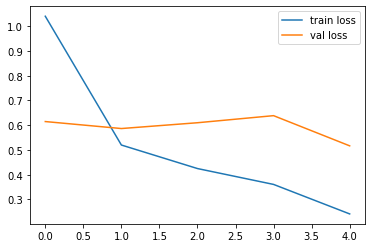

<Figure size 432x288 with 0 Axes>

In [38]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

Accuracy

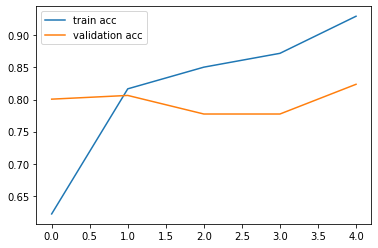

<Figure size 432x288 with 0 Axes>

In [45]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='validation acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [46]:
import tensorflow as tf

from keras.models import load_model

model.save('Flower_model.h5')

In [47]:
#Conclusion: Higher epochs may result in higher accuracy.

#Biblography
1. Blogs : [Aqeel Anwar](https://towardsdatascience.com/the-w3h-of-alexnet-vggnet-resnet-and-inception-7baaaecccc96)  
      [Jason Brownlee](https://machinelearningmastery.com/how-to-improve-performance-with-transfer-learning-for-deep-learning-neural-networks/)  
2. Youtube Channel : [Krish Naik](https://www.youtube.com/watch?v=zBOavqh3kWU&t=758s)  
[Deeplearning.ai](https://www.youtube.com/channel/UCcIXc5mJsHVYTZR1maL5l9w)
3. Special Thanks to Krish Naik Sir, he helped me have a clear understanding of the process and his general code template really help me to build this project.